# Observations
### 1) Aggregated Tweets from the NY Times, Fox News, and CNN trended positive.
### 2) Aggregated Tweets from the BBC and CBS trended negative, however, the BBC's sentiment clustered closer towards a compound sentiment of zero.
### 3) The sentiment analyzed is only for a single news day, essentially a sentiment snapshot of the news; a time series analysis  conducted over the course of several days (or up to a  full calendar year) can provide a more accurate picture of different news organizations' mean sentiment of their reporting on twitter.


In [1]:
! pip install nltk

In [2]:
ls

1/                           Untitled.ipynb
2/                           Untitled1.ipynb
3/                           __pycache__/
Homework/                    config.py
Project1_TrumpTwitter.ipynb


In [3]:
# Import Dependencies

import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [5]:
# Import and Initialize Sentiment Analyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [6]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
target_news_orgs = ["BBCWorld", "CBSNews","CNN","nytimes", "FoxNews" ]

In [8]:
news_sentiment = []

for news_org in target_news_orgs:
    counter = 1   

    # Get user's tweets, specifying the page
    public_tweets = api.user_timeline(news_org, count=100)

    # Loop through all tweets
    for tweet in public_tweets:
            
        # Convert tweet date
        converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            
        # Get tweet text
        tweet_text = tweet["text"]
            
        # Run sentiment analysis
        results = analyzer.polarity_scores(tweet["text"])
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]
        comp = results["compound"]
        
        news_sentiment.append({"News Organization": news_org,
                           "Date": converted_time,
                           "Compound": comp,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter,
                           "Tweet Text": tweet_text})
        #Add to counter

        counter += 1

In [9]:
len(news_sentiment)

500

In [10]:
news_sentiment_df = pd.DataFrame.from_dict(news_sentiment)

In [11]:
news_sentiment_df

,Compound,Date,Negative,Neutral,News Organization,Positive,Tweet Text,Tweets Ago
0,0.0000,2018-06-10 00:29:59+00:00,0.000,1.000,BBCWorld,0.000,Donating money to homeless people using your p...,1
1,0.0000,2018-06-10 00:29:59+00:00,0.000,1.000,BBCWorld,0.000,The Belgian students revising with monks at a ...,2
2,-0.3182,2018-06-10 00:25:18+00:00,0.187,0.813,BBCWorld,0.000,The other Balochistan: Six stories of life in ...,3
3,-0.4404,2018-06-10 00:16:02+00:00,0.367,0.633,BBCWorld,0.000,Long watch: Russia's dirty secret https://t.co...,4
4,0.0000,2018-06-09 22:40:30+00:00,0.000,1.000,BBCWorld,0.000,G7 summit: $3bn pledge for girls' education ht...,5
5,0.3309,2018-06-09 22:10:00+00:00,0.000,0.728,BBCWorld,0.272,G7 commits to 'rules-based trading system' des...,6
6,-0.5106,2018-06-09 19:39:30+00:00,0.320,0.680,BBCWorld,0.000,UN condemns Central African Republic hospital ...,7
7,0.5423,2018-06-09 19:14:02+00:00,0.000,0.741,BBCWorld,0.259,Trump: Kim has one shot at peace at Singapore ...,8
8,-0.6486,2018-06-09 17:20:32+00:00,0.431,0.569,BBCWorld,0.000,Disruptive passenger on Jet2 flight banned for...,9
9,0.0258,2018-06-09 16:16:27+00:00,0.111,0.773,BBCWorld,0.116,Inside Afghanistan's only secure psychiatric u...,10


In [26]:
# Save twitter data to CSV file
news_sentiment_df.to_csv("twitter_news_org_sentiment.csv", encoding="utf-8", index=False)

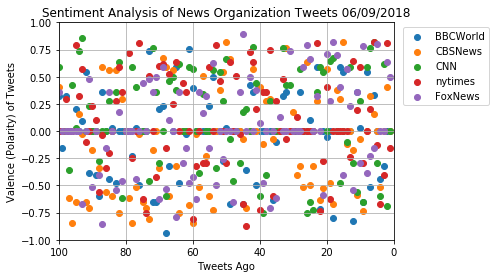

In [28]:
#Loop through and get relevant sentiment data of tweets
for news_org in target_news_orgs:
    dataframe = news_sentiment_df.loc[news_sentiment_df["News Organization"] == news_org]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = news_org)
    
    # Set the x and y limits
    plt.xlim(100, 0)
    plt.ylim(-1, 1)

    gnd= plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", scatterpoints=1, fontsize=10)

    # Titles/labels
    plt.title("Sentiment Analysis of News Organizations' Tweets 06/09/2018")
    plt.xlabel("Tweets Ago")
    plt.ylabel("Valence (Polarity) of Tweets")

    #Set grid
    plt.grid()

In [36]:
#Save figure
plt.savefig('Sentiment_Analysis_News_Organizations_Tweets.png')

In [45]:
#Group by News Org  
grouped_newsorgs = news_sentiment_df.groupby(["News Organization"], as_index = False)

In [46]:
#Find Mean Sentiment by news org
mean_newsorg_sentiment = grouped_newsorgs['Compound'].mean()
mean_newsorg_sentiment.head()

,News Organization,Compound
0,BBCWorld,-0.027290
1,CBSNews,-0.098146
2,CNN,0.105029
3,FoxNews,0.039923
4,nytimes,0.083889


In [47]:
# Arrays for Bar Charts
newsorgs_bar = mean_newsorg_sentiment["News Organization"]
compound_bar = mean_newsorg_sentiment["Compound"]
x_axis = np.arange(0, len(compound_bar), 1)

Text(0,0.5,'Tweet (Valence) Polarity')

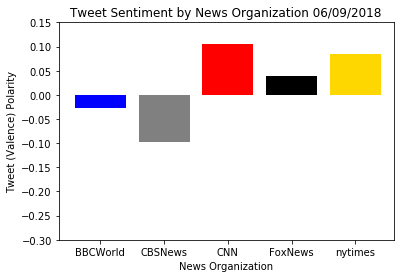

In [60]:
plt.bar(x_axis, compound_bar, color=["blue","gray","red","black","gold"], align="edge")

# Set x axis tick locations
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, newsorgs_bar)

# Set the limits of the x axis
plt.xlim(-0.25, len(x_axis))

# Set the limits of the y axis
plt.ylim(-.3, .15)

#Title/labels
plt.title("Tweet Sentiment by News Organization 06/09/2018")
plt.xlabel("News Organization")
plt.ylabel("Tweet (Valence) Polarity")

In [61]:
plt.savefig("tweet_sentiment_org.png")